#Análisis detallado

In [ ]:
!pip install kagglehub

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import json

path = kagglehub.dataset_download("kriegsmaschine/soccer-players-values-and-their-statistics")
print("Path to dataset files:", path)
drive.mount('/content/drive')

import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df1 = pd.read_csv(f'{path}/transfermarkt_fbref_201718.csv')
df2 = pd.read_csv(f'{path}/transfermarkt_fbref_201819.csv', sep=';', on_bad_lines='skip')
df3 = pd.read_csv(f'{path}/transfermarkt_fbref_201920.csv', sep=';', on_bad_lines='skip')

columns = ['age', 'height', 'position', 'position2', 'value', 'birth_year', 'squad', 'nationality', 'player']
df1 = df1[[col for col in columns if col in df1.columns]]
df2 = df2[[col for col in columns if col in df2.columns]]
df3 = df3[[col for col in columns if col in df3.columns]]
df = pd.concat([df1, df2, df3], ignore_index=True)
print(df.head())

sns.set_palette("coolwarm")
sns.set_style("whitegrid")

def analyze_players(players, characteristic):
    filtered_df = df[df['player'].isin(players)][['player', characteristic]]

    plt.figure(figsize=(10, 6))
    sns.barplot(x='player', y=characteristic, data=filtered_df)
    plt.title(f'Comparación de {characteristic.capitalize()} entre Jugadores')
    plt.xlabel('Jugador')
    plt.ylabel(characteristic.capitalize())
    plt.xticks(rotation=45)
    plt.show()

favorites_file = 'favorites.json'

def load_favorites():
    if os.path.exists(favorites_file):
        with open(favorites_file, 'r') as file:
            return json.load(file)
    return []

def save_favorites(favorites):
    with open(favorites_file, 'w') as file:
        json.dump(favorites, file)

def search_player(name):
    results = df[df['player'].str.contains(name, case=False, na=False)]
    return results

def player_characteristics(name):
    player_info = df[df['player'].str.contains(name, case=False, na=False)]
    if not player_info.empty:
        return player_info.to_dict(orient='records')[0]
    else:
        return "Jugador no encontrado."

def add_to_favorites(name):
    favorites = load_favorites()
    player_info = player_characteristics(name)
    if isinstance(player_info, dict):
        favorites.append(player_info)
        save_favorites(favorites)
        return f"{name} ha sido añadido a tus favoritos."
    else:
        return player_info

favorites = load_favorites()
print(f"Tus jugadores favoritos actuales: {favorites}")

def get_user_input():
    players = input("Ingresa los nombres de los jugadores a evaluar (separados por comas): ").split(",")
    players = [player.strip() for player in players]
    characteristic = input("Ingresa la característica a evaluar (e.g., age, height, value): ").strip()
    return players, characteristic

players_to_compare, characteristic_to_compare = get_user_input()
analyze_players(players_to_compare, characteristic_to_compare)


#Función favoritos, diagramas generales


Path to dataset files: /root/.cache/kagglehub/datasets/kriegsmaschine/soccer-players-values-and-their-statistics/versions/1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/root/.cache/kagglehub/datasets/kriegsmaschine/soccer-players-values-and-their-statistics/versions/1/transfermarkt_fbref_201819.csv
/root/.cache/kagglehub/datasets/kriegsmaschine/soccer-players-values-and-their-statistics/versions/1/transfermarkt_fbref_201920.csv
/root/.cache/kagglehub/datasets/kriegsmaschine/soccer-players-values-and-their-statistics/versions/1/transfermarkt_fbref_201718.csv


<ipython-input-33-c2081c4d018a>:23: DtypeWarning: Columns (395) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(f'{path}/transfermarkt_fbref_201819.csv', sep=';', on_bad_lines='skip')


   age  height position position2  value  birth_year squad nationality player
0  NaN     NaN      NaN       NaN    NaN         NaN   NaN         NaN    NaN
1  NaN     NaN      NaN       NaN    NaN         NaN   NaN         NaN    NaN
2  NaN     NaN      NaN       NaN    NaN         NaN   NaN         NaN    NaN
3  NaN     NaN      NaN       NaN    NaN         NaN   NaN         NaN    NaN
4  NaN     NaN      NaN       NaN    NaN         NaN   NaN         NaN    NaN
Tus jugadores favoritos actuales: []


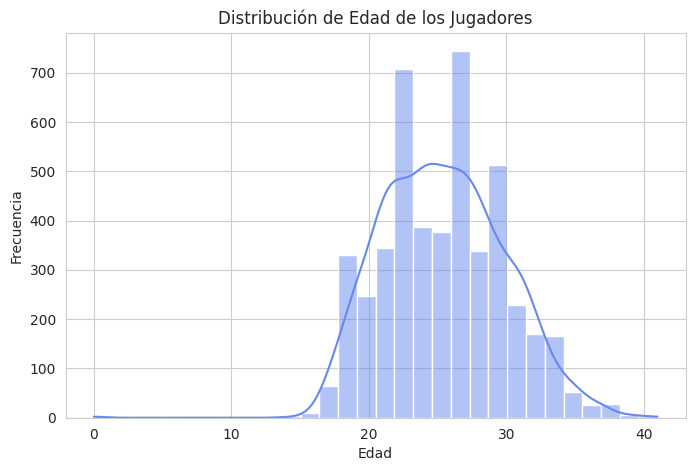

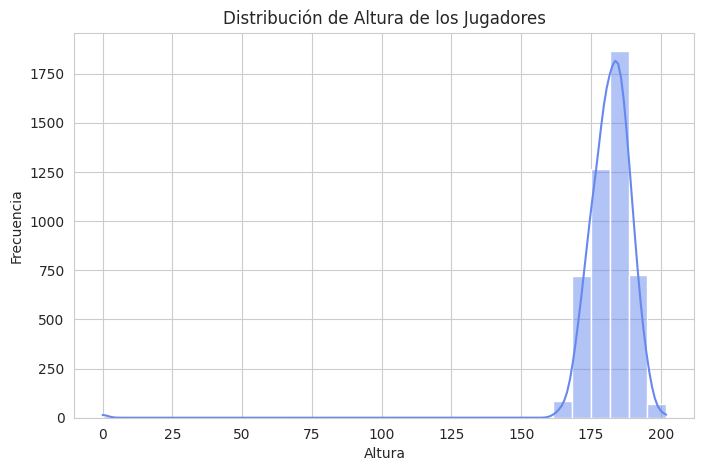

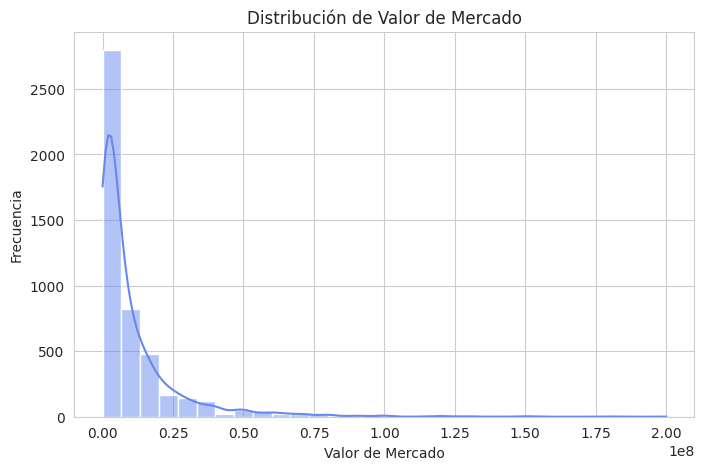

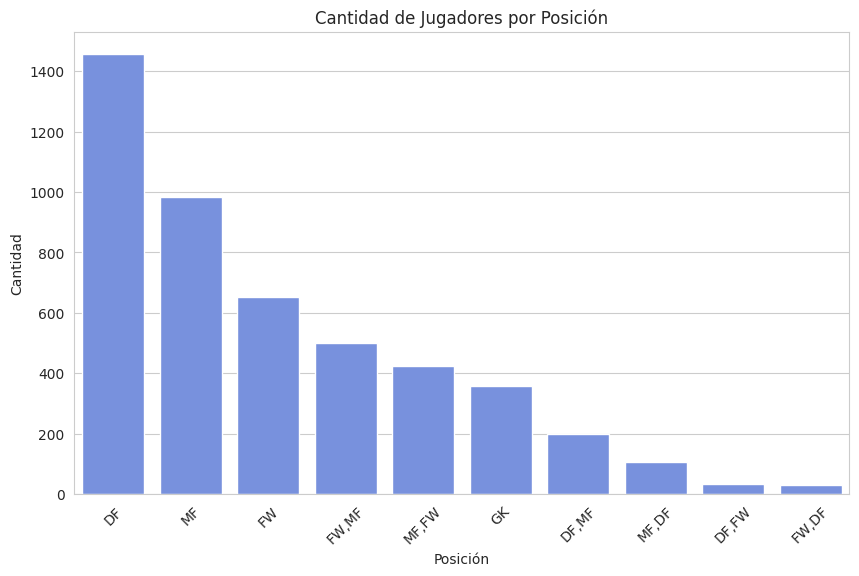

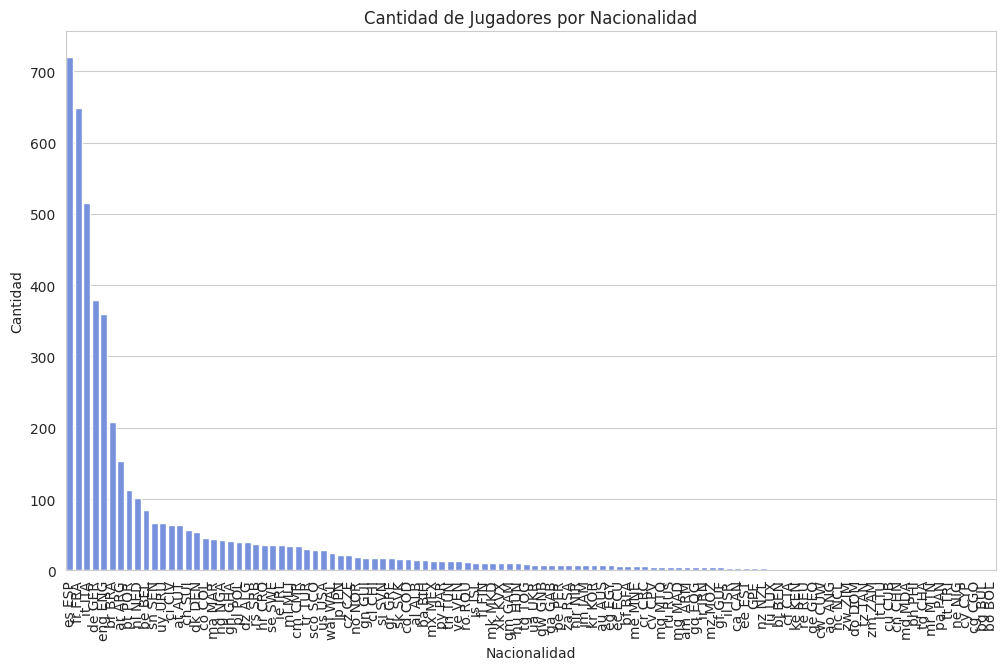

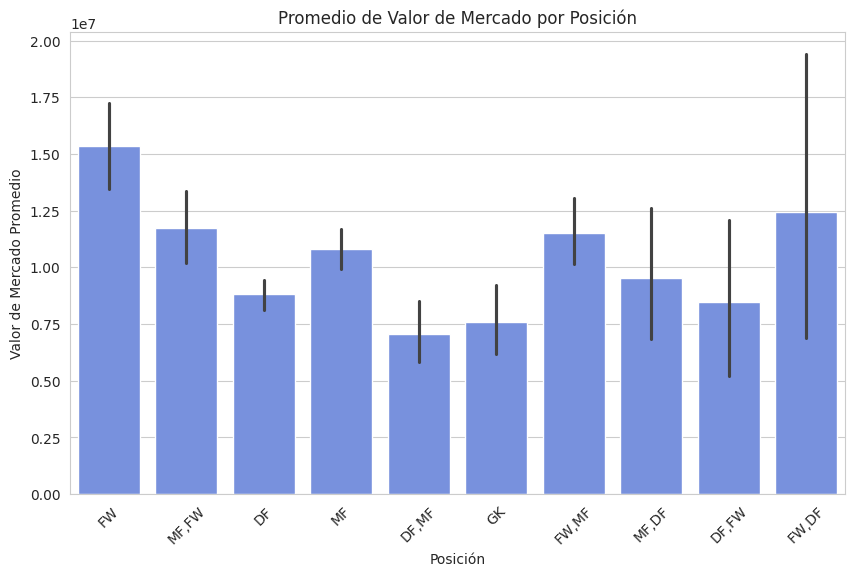

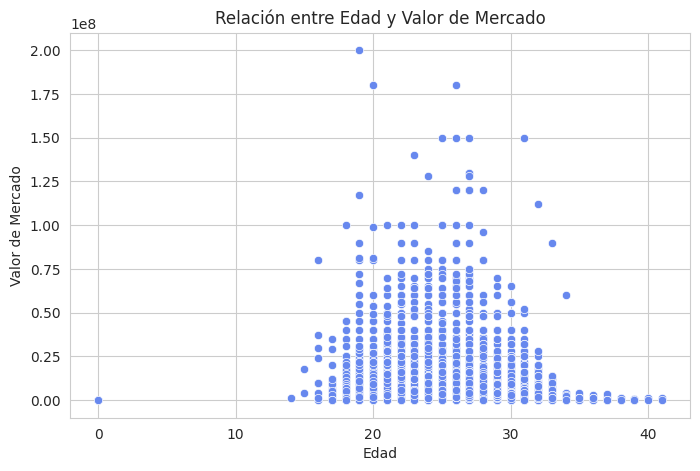

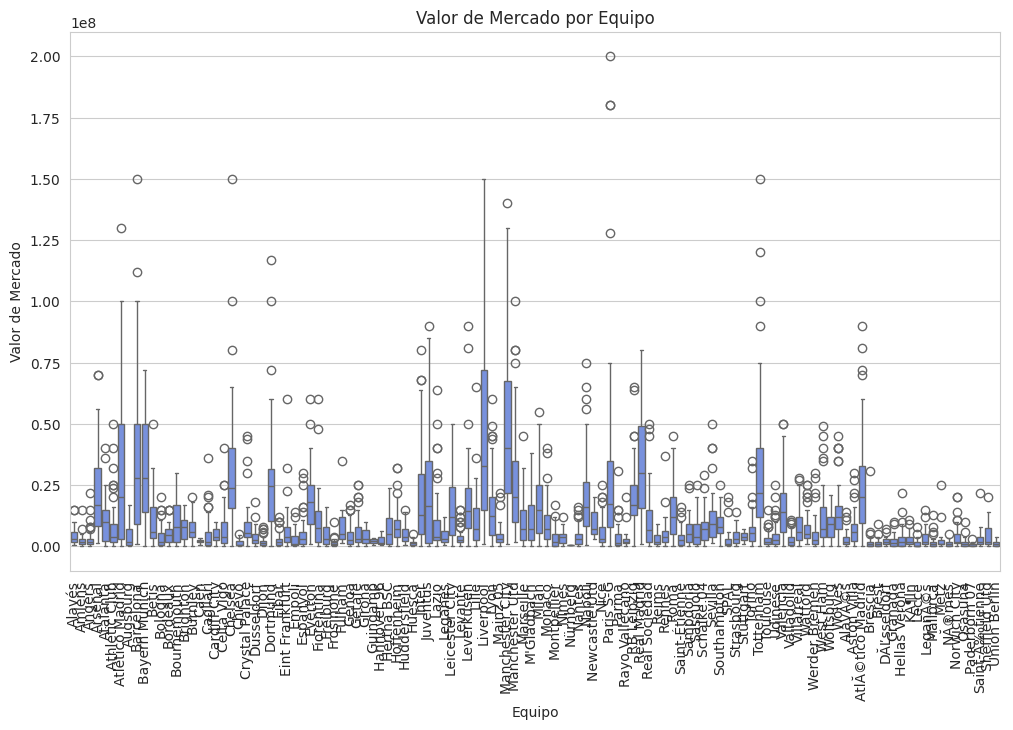

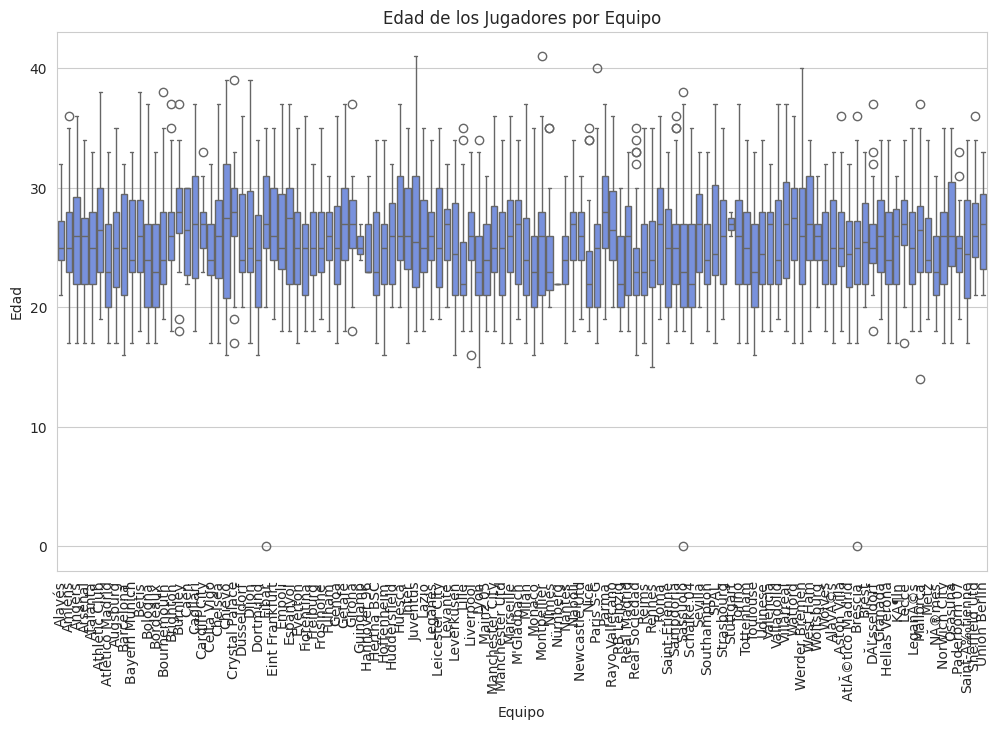

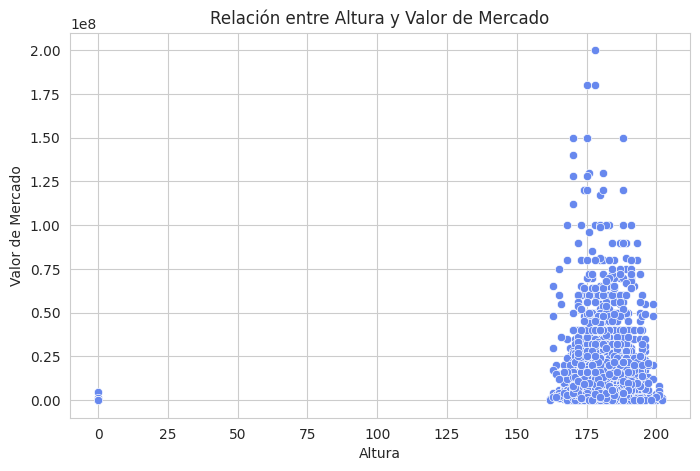

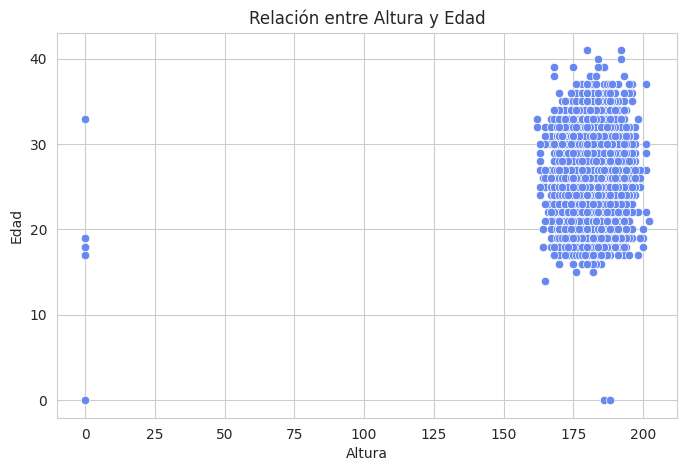

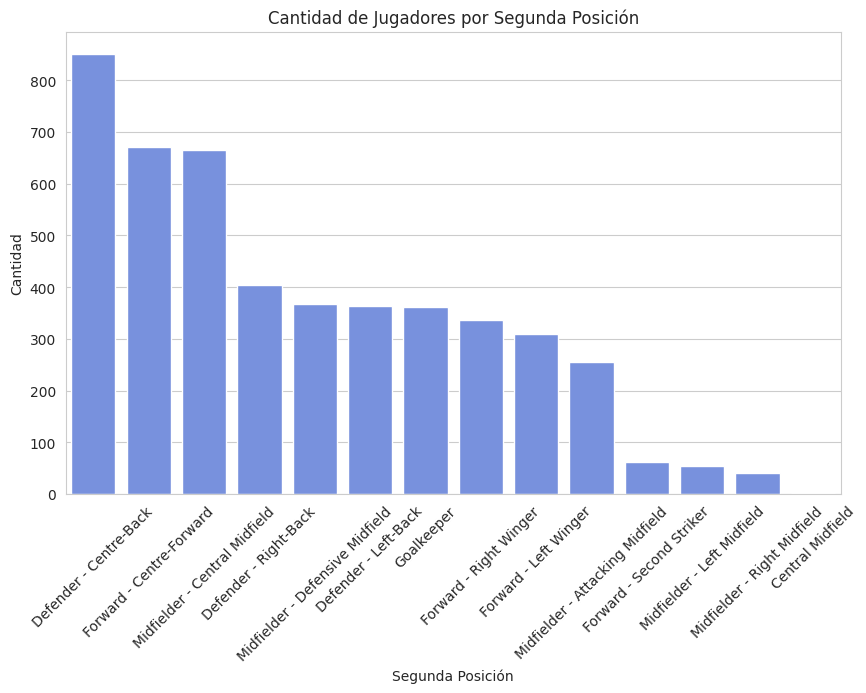

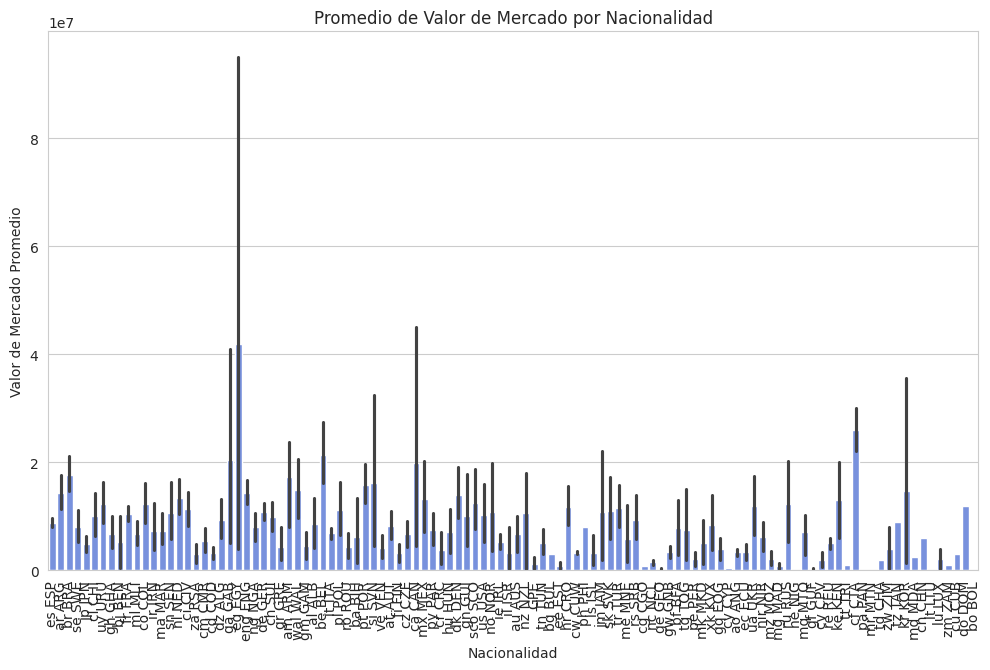

In [ ]:
!pip install kagglehub

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import json

path = kagglehub.dataset_download("kriegsmaschine/soccer-players-values-and-their-statistics")

print("Path to dataset files:", path)

import os

drive.mount('/content/drive')

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df1 = pd.read_csv(f'{path}/transfermarkt_fbref_201718.csv')
df2 = pd.read_csv(f'{path}/transfermarkt_fbref_201819.csv', sep=';', on_bad_lines='skip')
df3 = pd.read_csv(f'{path}/transfermarkt_fbref_201920.csv', sep=';', on_bad_lines='skip')

columns = ['age', 'height', 'position', 'position2', 'value', 'birth_year', 'squad', 'nationality', 'player']

df1 = df1[[col for col in columns if col in df1.columns]]
df2 = df2[[col for col in columns if col in df2.columns]]
df3 = df3[[col for col in columns if col in df3.columns]]

df = pd.concat([df1, df2, df3], ignore_index=True)
print(df.head())

sns.set_palette("coolwarm")
sns.set_style("whitegrid")

def plot_age_distribution():
    plt.figure(figsize=(8, 5))
    sns.histplot(df['age'], bins=30, kde=True)
    plt.title('Distribución de Edad de los Jugadores')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.show()

def plot_height_distribution():
    plt.figure(figsize=(8, 5))
    sns.histplot(df['height'], bins=30, kde=True)
    plt.title('Distribución de Altura de los Jugadores')
    plt.xlabel('Altura')
    plt.ylabel('Frecuencia')
    plt.show()

def plot_value_distribution():
    plt.figure(figsize=(8, 5))
    sns.histplot(df['value'], bins=30, kde=True)
    plt.title('Distribución de Valor de Mercado')
    plt.xlabel('Valor de Mercado')
    plt.ylabel('Frecuencia')
    plt.show()

def plot_position_count():
    plt.figure(figsize=(10, 6))
    sns.countplot(x='position', data=df, order=df['position'].value_counts().index)
    plt.title('Cantidad de Jugadores por Posición')
    plt.xlabel('Posición')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.show()

def plot_nationality_count():
    plt.figure(figsize=(12, 7))
    sns.countplot(x='nationality', data=df, order=df['nationality'].value_counts().index)
    plt.title('Cantidad de Jugadores por Nacionalidad')
    plt.xlabel('Nacionalidad')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=90)
    plt.show()

def plot_avg_value_by_position():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='position', y='value', data=df, estimator=lambda x: sum(x) / len(x))
    plt.title('Promedio de Valor de Mercado por Posición')
    plt.xlabel('Posición')
    plt.ylabel('Valor de Mercado Promedio')
    plt.xticks(rotation=45)
    plt.show()

def plot_value_vs_age():
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='age', y='value', data=df)
    plt.title('Relación entre Edad y Valor de Mercado')
    plt.xlabel('Edad')
    plt.ylabel('Valor de Mercado')
    plt.show()

def plot_squad_value():
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='squad', y='value', data=df)
    plt.title('Valor de Mercado por Equipo')
    plt.xlabel('Equipo')
    plt.ylabel('Valor de Mercado')
    plt.xticks(rotation=90)
    plt.show()

def plot_squad_age():
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='squad', y='age', data=df)
    plt.title('Edad de los Jugadores por Equipo')
    plt.xlabel('Equipo')
    plt.ylabel('Edad')
    plt.xticks(rotation=90)
    plt.show()

def plot_height_vs_value():
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='height', y='value', data=df)
    plt.title('Relación entre Altura y Valor de Mercado')
    plt.xlabel('Altura')
    plt.ylabel('Valor de Mercado')
    plt.show()

def plot_height_vs_age():
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='height', y='age', data=df)
    plt.title('Relación entre Altura y Edad')
    plt.xlabel('Altura')
    plt.ylabel('Edad')
    plt.show()

def plot_position2_count():
    plt.figure(figsize=(10, 6))
    sns.countplot(x='position2', data=df, order=df['position2'].value_counts().index)
    plt.title('Cantidad de Jugadores por Segunda Posición')
    plt.xlabel('Segunda Posición')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.show()

def plot_avg_value_by_nationality():
    plt.figure(figsize=(12, 7))
    sns.barplot(x='nationality', y='value', data=df, estimator=lambda x: sum(x) / len(x))
    plt.title('Promedio de Valor de Mercado por Nacionalidad')
    plt.xlabel('Nacionalidad')
    plt.ylabel('Valor de Mercado Promedio')
    plt.xticks(rotation=90)
    plt.show()

favorites_file = 'favorites.json'

def load_favorites():
    if os.path.exists(favorites_file):
        with open(favorites_file, 'r') as file:
            return json.load(file)
    return []

def save_favorites(favorites):
    with open(favorites_file, 'w') as file:
        json.dump(favorites, file)

def search_player(name):
    results = df[df['player'].str.contains(name, case=False, na=False)]
    return results

def player_characteristics(name):
    player_info = df[df['player'].str.contains(name, case=False, na=False)]
    if not player_info.empty:
        return player_info.to_dict(orient='records')[0]
    else:
        return "Jugador no encontrado."

def add_to_favorites(name):
    favorites = load_favorites()
    player_info = player_characteristics(name)
    if isinstance(player_info, dict):
        favorites.append(player_info)
        save_favorites(favorites)
        return f"{name} ha sido añadido a tus favoritos."
    else:
        return player_info

favorites = load_favorites()
print(f"Tus jugadores favoritos actuales: {favorites}")

plot_age_distribution()
plot_height_distribution()
plot_value_distribution()
plot_position_count()
plot_nationality_count()
plot_avg_value_by_position()
plot_value_vs_age()
plot_squad_value()
plot_squad_age()
plot_height_vs_value()
plot_height_vs_age()
plot_position2_count()
plot_avg_value_by_nationality()
